## описание ДЗ-1

В первой домашке вы обучите свою первую нейронку.

За дз можно получить максимум 10 баллов. **Домашки довольно творческие, если замечу копию нотбука у другого студента то максимальный балл сниижается до 3 )**

Разбалловка:
*   **Воспроизводимость и читабельность кода - 6 баллов** (все воспроизвелось и все понятно для проверяющего - 6 баллов; есть непонятные моменты, но все воспроизвелось - 4 балла; непонятный код и/или воспроизводится с небольшой правкой - 2 балл; непонятный код и/или ничего не воспроизвелось - 0 баллов).
*   **Технический отчет - 4 балла** (приведены результаты сравнения и выводы что сделали чтоб перебить baseline\другую модель, к примеру одна модель лучше/хуже нейронки и тд - 4 балла, только результаты - 2 балл, ничего нет - 0 баллов).


Присылать домашки по ссылке https://forms.gle/W8jwbwA4EWagEbX66

## первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [24]:
random_state = 123

In [25]:
df = pd.read_csv("data.csv", index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


<Axes: xlabel='x1', ylabel='x2'>

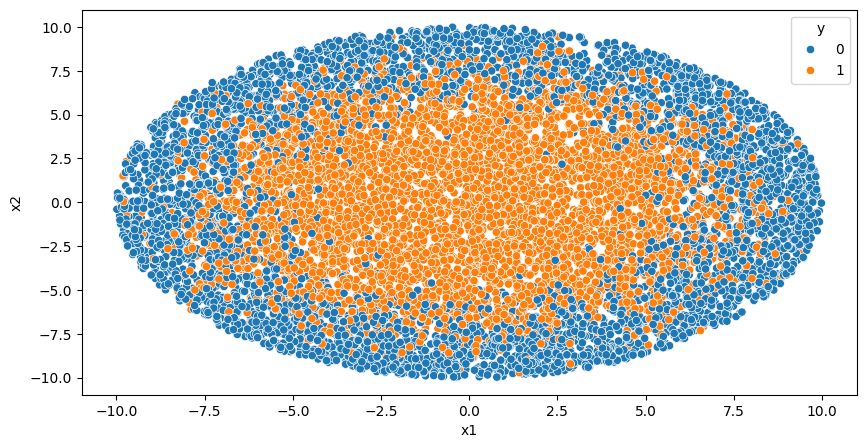

In [26]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="x1", y="x2", hue="y", data=df)

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["x1", "x2"]],
    df["y"],
    test_size=0.33,
)

Точность нашей модели 0.5990909090909091


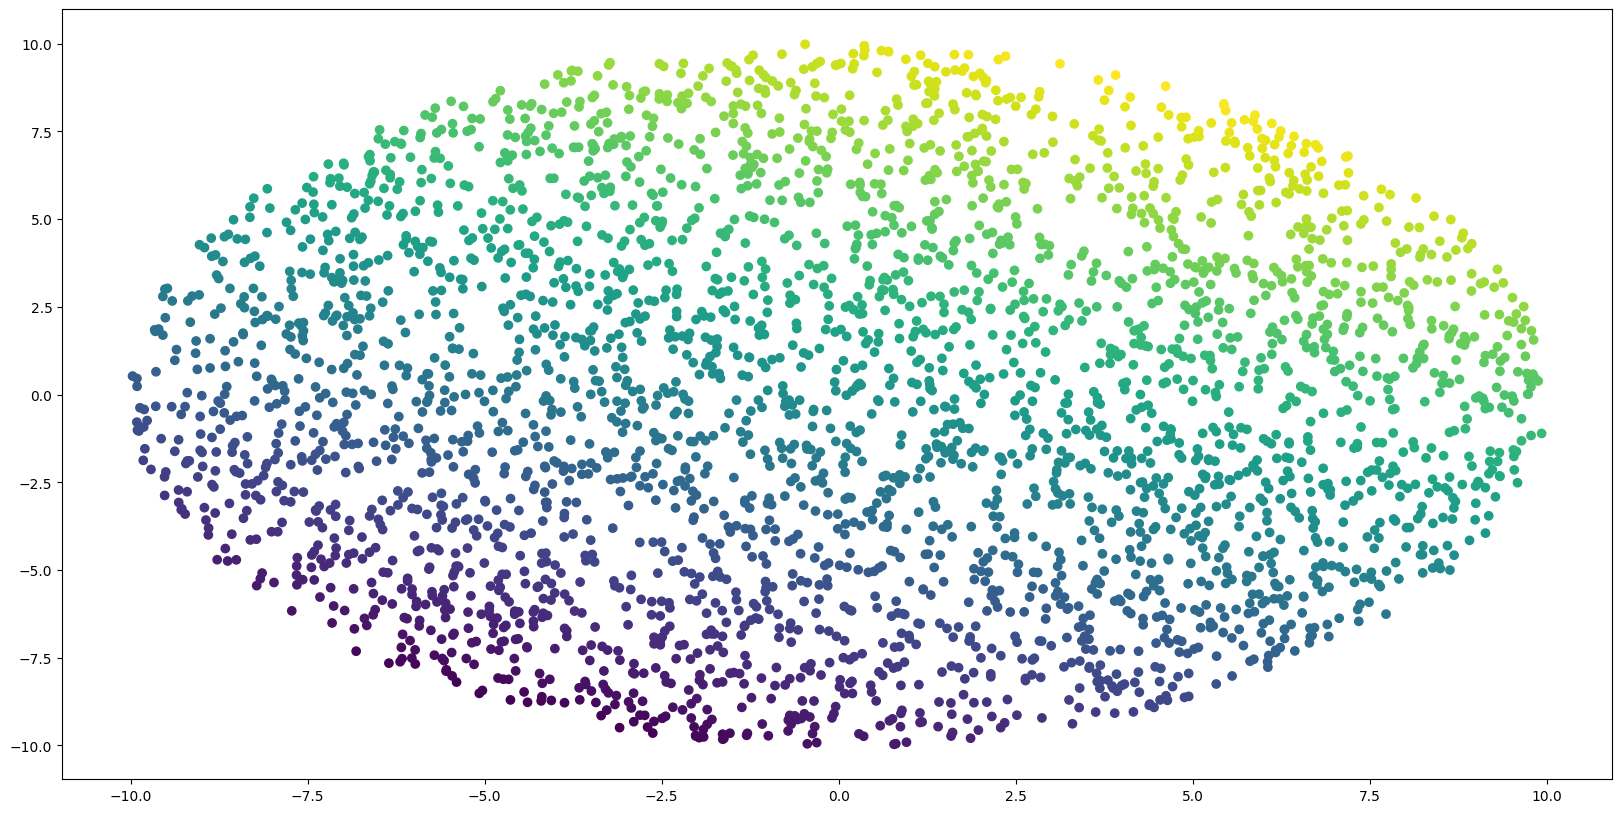

In [28]:
#########################################
# Ваш код для Логистической регрессии

lr = LogisticRegression(random_state=random_state)

lr.fit(X_train, y_train)

predict_logit = lr.predict(X_test)
predict_log_proba = lr.predict_proba(X_test)[:, 1]

#########################################


print(f"Точность нашей модели {accuracy_score(predict_logit, y_test)}")

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test["x1"], X_test["x2"], c=predict_log_proba)
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.5018181818181818


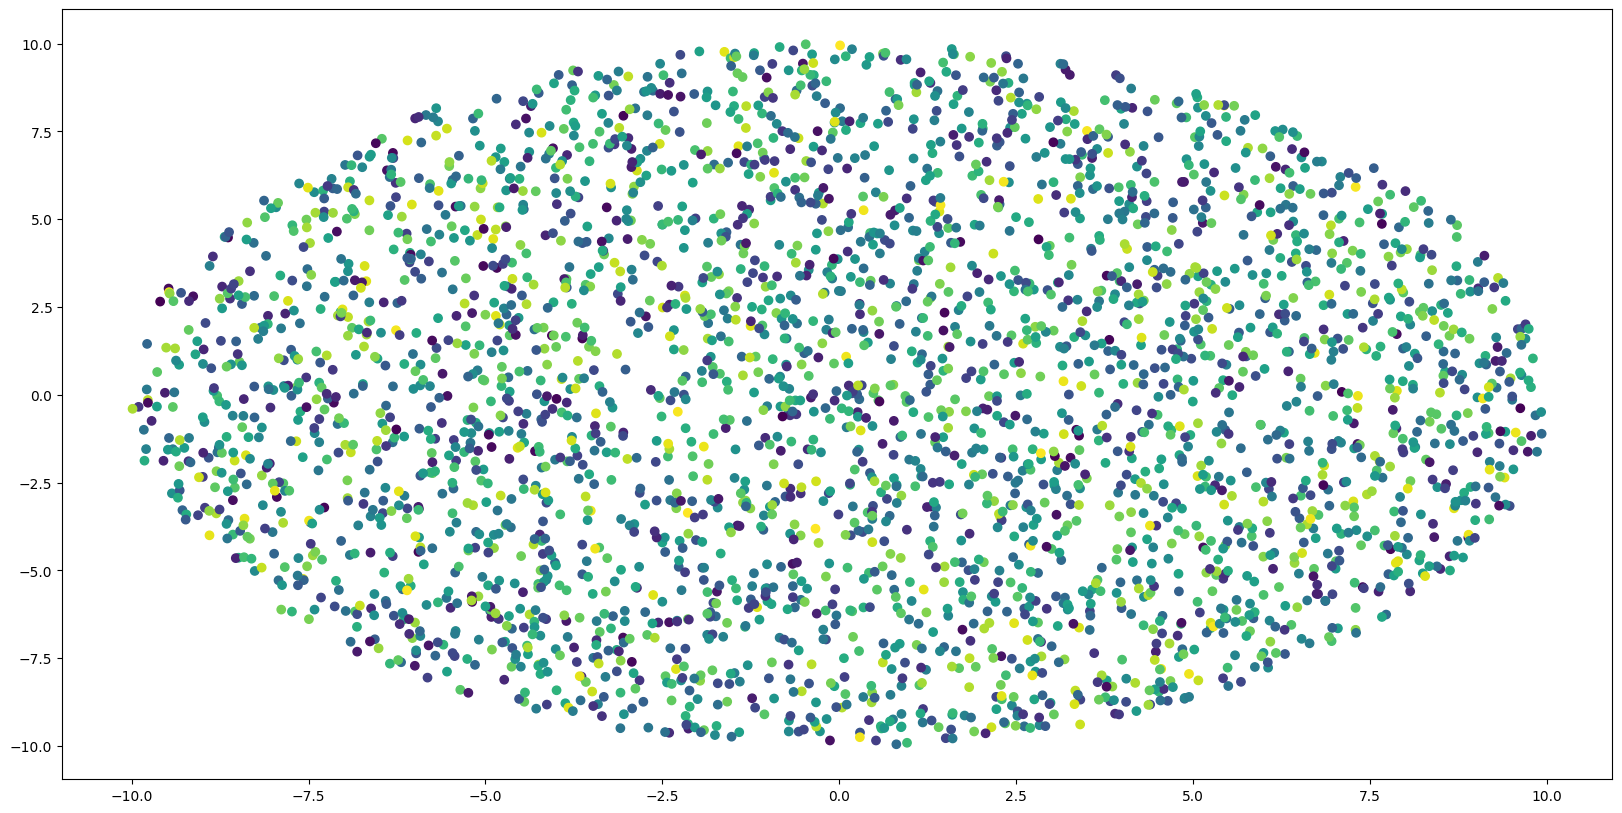

In [29]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new["new_feature_1"] = df_new["x1"] + df_new["x2"]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    df_new[["x1", "x2", "new_feature_1"]],
    df_new["y"],
    test_size=0.33,
)

lr.fit(X_train, y_train)

predict_logit = lr.predict(X_test)
predict_log_proba = lr.predict_proba(X_test)[:, 1]

#########################################

print(f"Точность нашей модели {accuracy_score(predict_logit,y_test_new)}")

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new["x1"], X_test_new["x2"], c=predict_log_proba)
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

**ответ**: особенность деревьев - склонность к переобучению, поэтому важно ограничить максимальную глубину, т.е. зафиксировать max_depth

Точность нашей модели 0.8063636363636364


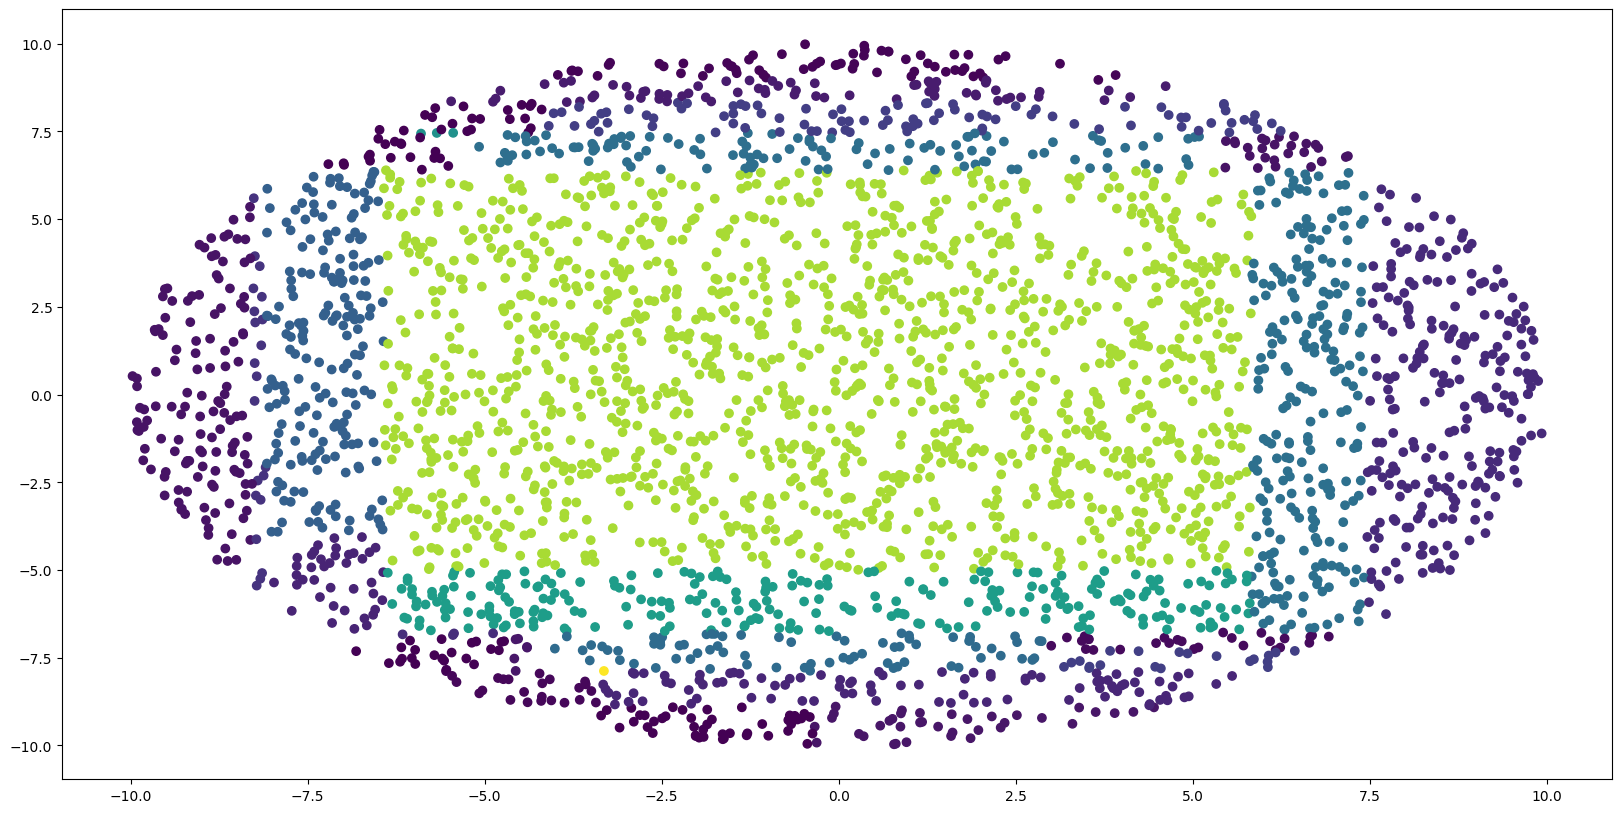

In [30]:
#########################################
# Ваш код

cls = DecisionTreeClassifier(
    random_state=random_state,
    max_depth=5,
)

cls.fit(X_train, y_train)

predict_tree = cls.predict(X_test)
print(f"Точность нашей модели {accuracy_score(predict_tree, y_test)}")

predict_tree_proba = cls.predict_proba(X_test)[:, 1]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test["x1"], X_test["x2"], c=predict_tree_proba)
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

**ответ**: ансамбль дает хорошие результаты, когда мало шумовых признаков. в данном случае ансамблирование поможет (что видно по результату), тк признаков всего 2 штуки

Точность нашей модели 0.8236363636363636


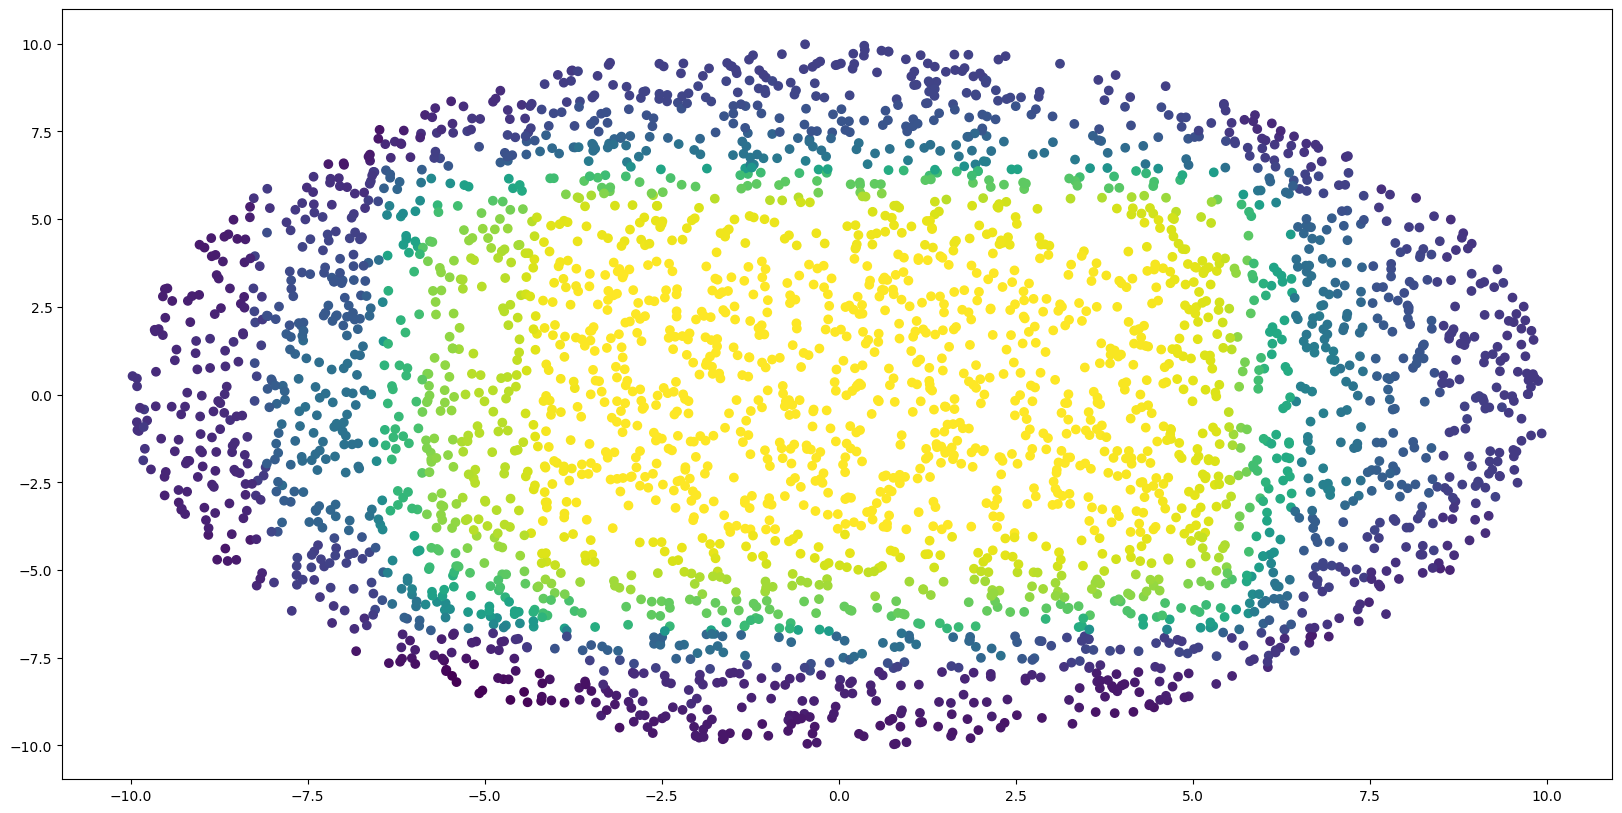

In [31]:
#########################################
# Ваш код

cls = RandomForestClassifier(
    random_state=random_state,
    n_estimators=500,
    max_depth=5,
)

cls.fit(X_train, y_train)

predict_forest = cls.predict(X_test)
print(f"Точность нашей модели {accuracy_score(predict_forest, y_test)}")

predict_forest_proba = cls.predict_proba(X_test)[:, 1]

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test["x1"], X_test["x2"], c=predict_forest_proba)
plt.show()

# torch

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - (пример архитектуры - 2 слоя по 5 нейронов в каждом). Смотрим на тетрадку(семинар) и копипастим все нужное сюда!

In [32]:
# Подгружаем понравившийся фраемворк
# Собираем сетку
# Учим и радуемся!

In [33]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

from torchmetrics import Accuracy

In [34]:
INPUT_SIZE = 2
HIDDEN_SIZE = 5
OUTPUT_SIZE = 2
LEARNING_RATE = 1e-3
EPOCHS = 120
BATCH_SIZE = 128

In [35]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = data_utils.TensorDataset(
        torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train)
    )
    train_loader = data_utils.DataLoader(
        dataset=train_tensor, batch_size=BATCH_SIZE, shuffle=True
    )

    test_tensor = data_utils.TensorDataset(
        torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test)
    )
    test_loader = data_utils.DataLoader(
        dataset=test_tensor, batch_size=BATCH_SIZE, shuffle=False
    )
    return train_loader, test_loader

In [36]:
def build_simple_model():
    model = nn.Sequential(
        nn.Linear(in_features=INPUT_SIZE, out_features=HIDDEN_SIZE),
        nn.Sigmoid(),
        nn.Linear(in_features=HIDDEN_SIZE, out_features=HIDDEN_SIZE),
        nn.Sigmoid(),
        nn.Linear(in_features=HIDDEN_SIZE, out_features=OUTPUT_SIZE),
        nn.Softmax(dim=1),
    )

    return model

In [37]:
train_loader, test_loader = create_data_loader(
    X_train.values,
    y_train.values,
    X_test.values,
    y_test.values,
)
model = build_simple_model()

In [38]:
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()
accuracy = Accuracy(task="multiclass", num_classes=2)

In [39]:
train_loss_values = []
train_accuracy_values = []
valid_loss_values = []
valid_accuracy = []


def run_train():
    step = 0

    # Epochs
    for epoch in range(EPOCHS):
        running_loss = []
        running_acc = []
        model.train()
        for features, label in train_loader:
            # Reset gradients
            optimizer.zero_grad()

            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)
            loss.backward()

            # softmax_output = softmax(output)
            acc = accuracy(output, label).item()

            # Update weights with gradients
            optimizer.step()

            running_loss.append(loss.item())
            running_acc.append(acc)

            step += 1

        train_loss_values.append(np.mean(running_loss))
        train_accuracy_values.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print(
                "EPOCH %d : train_loss: %f train_acc: %f"
                % (epoch, train_loss_values[-1], train_accuracy_values[-1])
            )

        # Run validation
        running_loss = []
        running_acc = []
        model.eval()
        for features, label in test_loader:
            output = model(features)
            # Calculate error and backpropagate
            loss = criterion(output, label)

            # softmax_output = softmax(output)
            acc = accuracy(output, label).item()

            running_loss.append(loss.item())
            running_acc.append(acc)

        valid_loss_values.append(np.mean(running_loss))
        valid_accuracy.append(np.mean(running_acc))
        if epoch % 20 == 0:
            print(
                "EPOCH %d : valid_loss: %f valid_acc: %f"
                % (epoch, valid_loss_values[-1], valid_accuracy[-1])
            )

In [40]:
run_train()

EPOCH 0 : train_loss: 0.697981 train_acc: 0.488636
EPOCH 0 : valid_loss: 0.694573 valid_acc: 0.494507
EPOCH 20 : train_loss: 0.685832 train_acc: 0.588202
EPOCH 20 : valid_loss: 0.686118 valid_acc: 0.584772
EPOCH 40 : train_loss: 0.555000 train_acc: 0.827750
EPOCH 40 : valid_loss: 0.553067 valid_acc: 0.827776
EPOCH 60 : train_loss: 0.494244 train_acc: 0.831891
EPOCH 60 : valid_loss: 0.495419 valid_acc: 0.830216
EPOCH 80 : train_loss: 0.479733 train_acc: 0.833512
EPOCH 80 : valid_loss: 0.482240 valid_acc: 0.832404
EPOCH 100 : train_loss: 0.473004 train_acc: 0.837948
EPOCH 100 : valid_loss: 0.476475 valid_acc: 0.834976


Точность нашей модели 0.8372727272727273


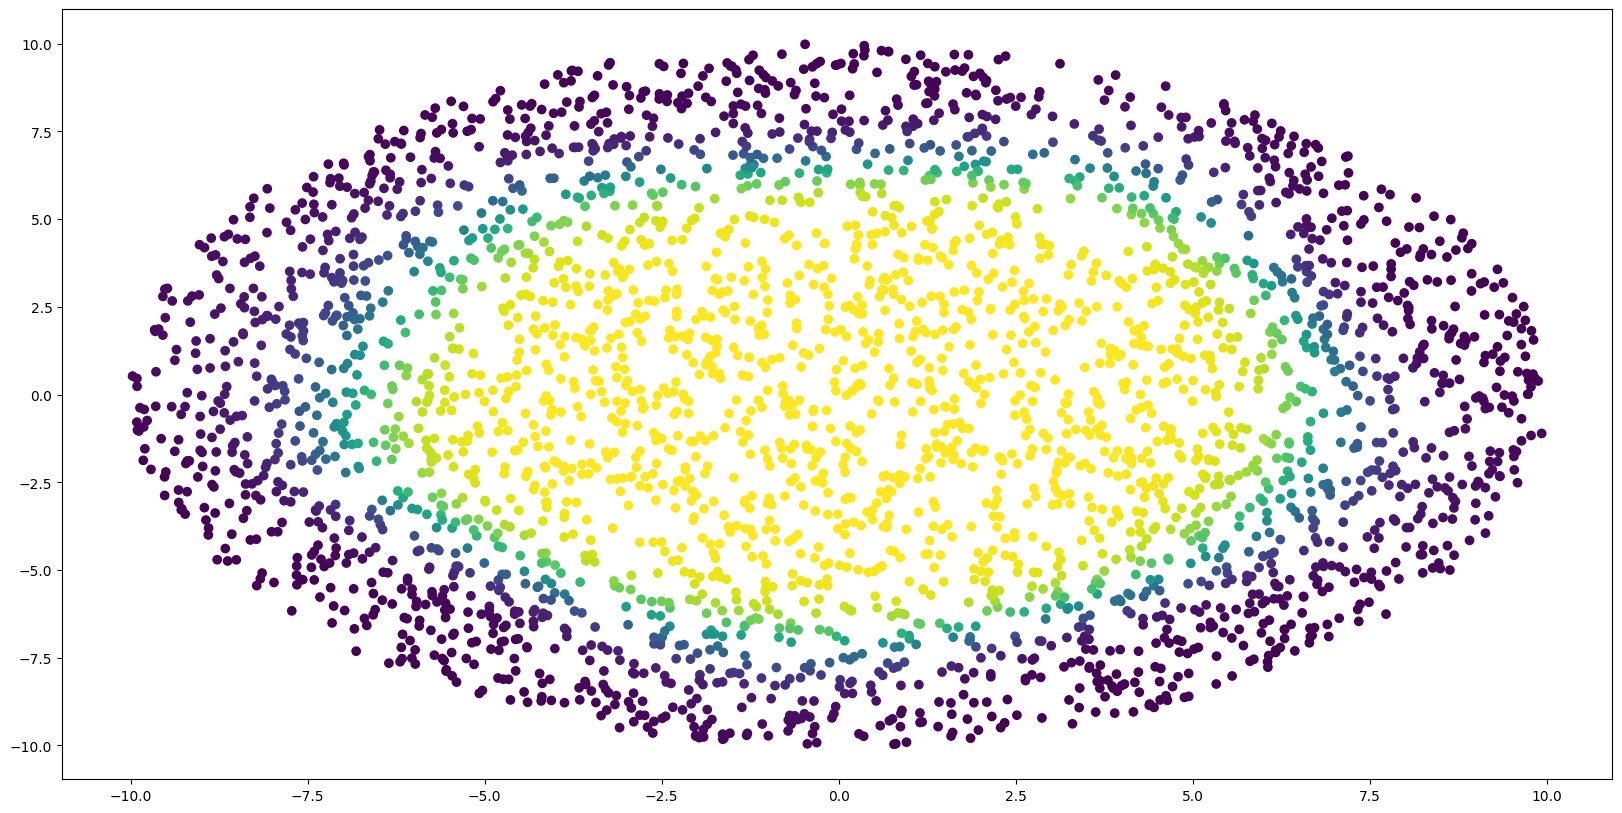

In [41]:
#########################################
# Ваш код

predict_neural = model.forward(torch.tensor(X_test.values.astype(np.float32)))
predict_classes = torch.argmax(predict_neural, dim=1)

print(f"Точность нашей модели {accuracy_score(predict_classes, y_test)}")
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test["x1"], X_test["x2"], c=predict_neural[:, 1].detach())
plt.show()